In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

In [10]:

data = pd.read_csv("Schoolsdata.csv")

pd.set_option('display.max_rows', None) # allows me to see all the rows of the data set

data[['Neighborhood','Estimate; Total:']].head() # showing just most recent crime rate

,Neighborhood,Estimate; Total:
0,Allegheny Center,1389.0
1,Allegheny West,343.0
2,Allentown,2520.0
3,Arlington,1823.0
4,Arlington Heights,213.0


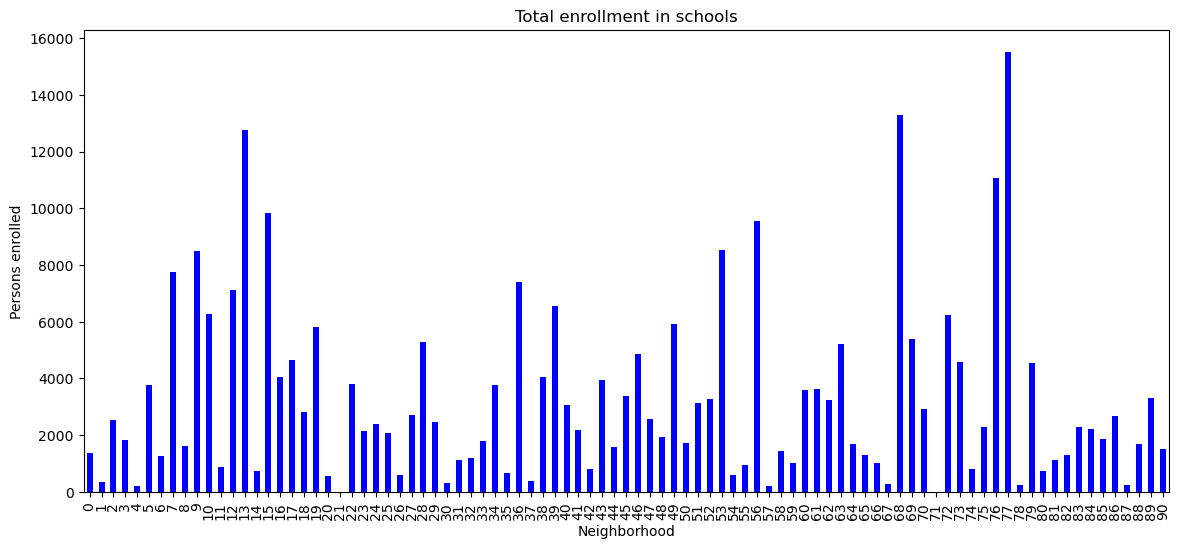

In [17]:
# Creating a bar graph to determine the neighborhood with largest amount of people enrolled in schools
plt.figure(figsize=(14, 6))  # allows the graph to fit on screen 
data['Estimate; Total:'].plot(kind='bar', color='blue')

# labeling the axis and creating a title
plt.title('Total enrollment in schools')
plt.xlabel('Neighborhood')
plt.ylabel('Persons enrolled')

plt.show()

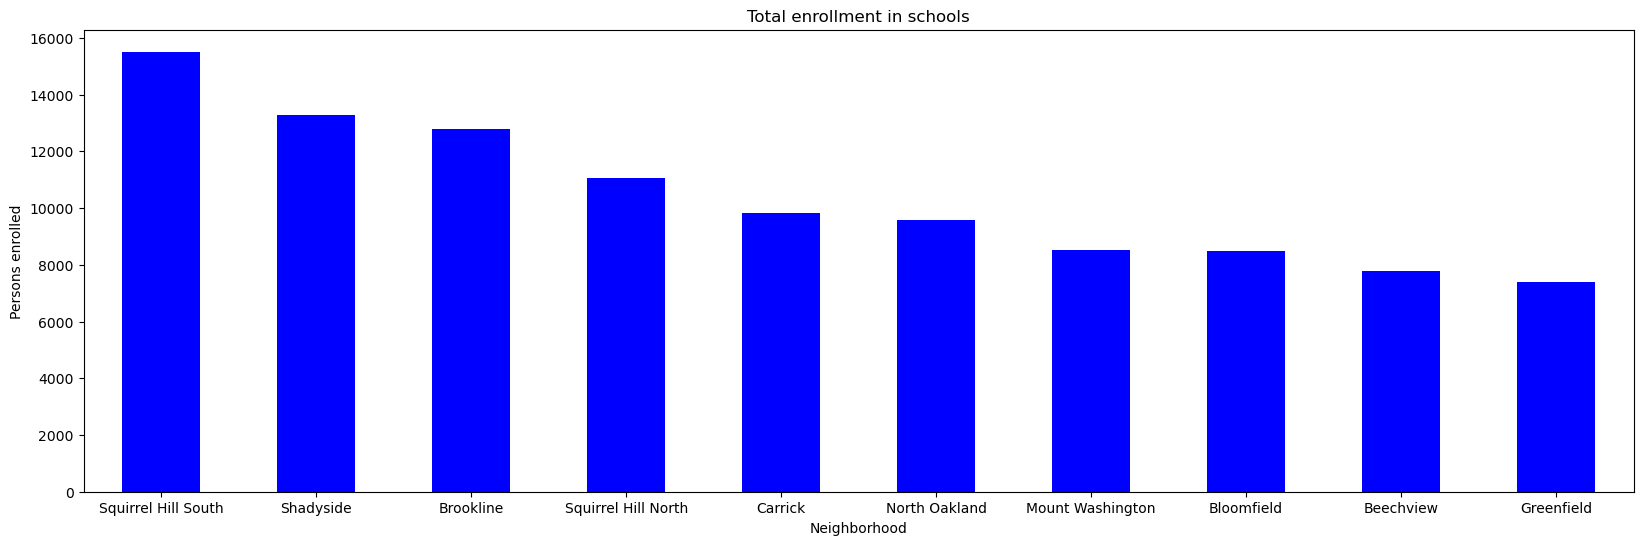

In [24]:
# now a top 10 most neighborhoods with school enrollment
top_10_enroll = data[['Neighborhood', 'Estimate; Total:']].sort_values(by='Estimate; Total:', ascending=False).head(10)
plt.figure(figsize=(20, 6))  # Set the figure size
top_10_enroll.set_index('Neighborhood')['Estimate; Total:'].plot(kind='bar', color='blue', rot = 0)


plt.title('Total enrollment in schools')
plt.xlabel('Neighborhood')
plt.ylabel('Persons enrolled')

plt.show()

1. add map of pgh
2. Over lay dark color with more crime
3. Summarize and give best based off of this data

<Axes: >

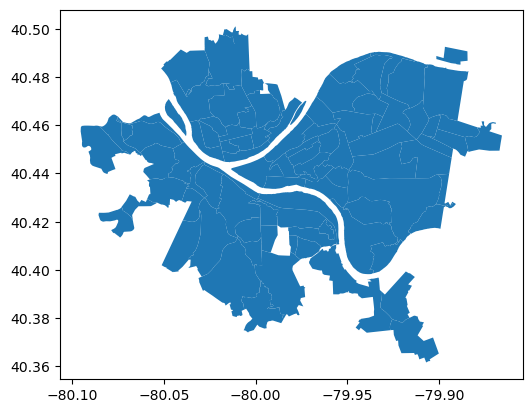

In [8]:
# now adding the map of all the neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


<Axes: >

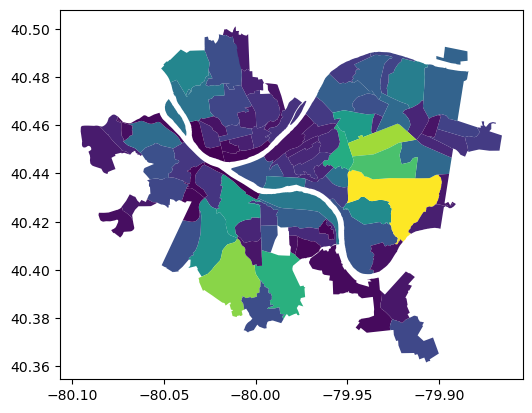

In [31]:
# do the merge
data = pd.read_csv("Schoolsdata.csv")

school_count = data.groupby('Neighborhood')['Estimate; Total:'].sum().reset_index()
school_map = neighborhoods.merge(school_count, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
school_map[['hood','Estimate; Total:','geometry']].head()

school_map.plot(column='Estimate; Total:')


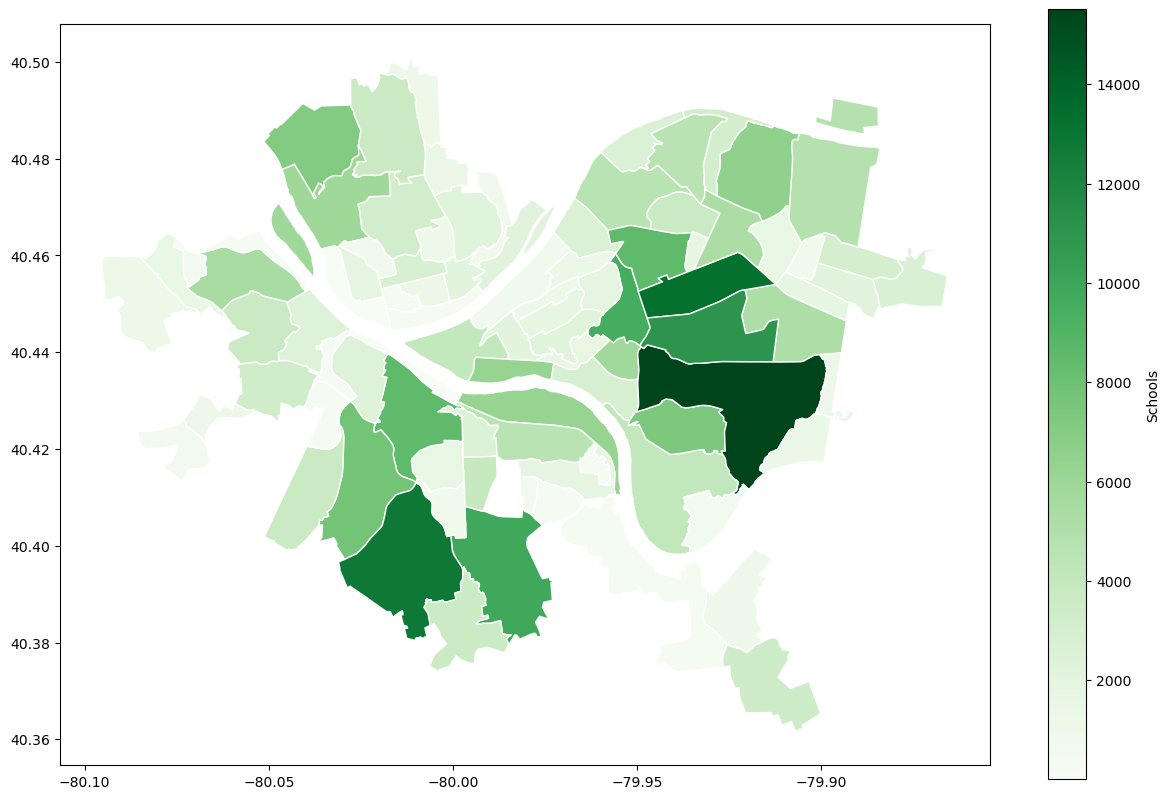

In [37]:
school_map.plot(column='Estimate; Total:', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Schools"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()